In [1]:
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))


Python: 3.7.11 (default, Jul  3 2021, 18:01:19) 
[GCC 7.5.0]
scipy: 1.4.1
numpy: 1.19.5
matplotlib: 3.2.2
pandas: 1.1.5
sklearn: 0.22.2.post1


In [23]:
import pandas
#from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report


In [3]:

# Load dataset
names = ['Hours']		#column names 
# Reading data from remote link
#dataset = pandas.read_csv("C:/Users/VARTIKA/Desktop/Student.csv", names=names)
url = "http://bit.ly/w-data"
dataset = pandas.read_csv(url)
# Dimensions of dataset
#shape
print(dataset.shape) 
print(dataset.head(10))

(25, 2)
   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
5    1.5      20
6    9.2      88
7    5.5      60
8    8.3      81
9    2.7      25


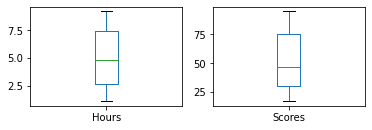

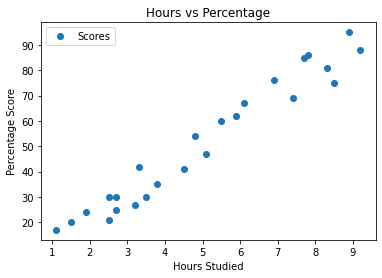

In [4]:
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

dataset.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [5]:
X = dataset.iloc[:, :-1].values  
Y = dataset.iloc[:, 1].values

from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                            test_size=0.2, random_state=0) 


In [6]:
#prediction of logistic regression#
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
#regressor.fit(x.reshape(-1, 1), y)
regressor.fit(X_train, Y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
#best value of intercept
print(regressor.intercept_)

2.018160041434662


In [8]:
#for retrieving the slope
print(regressor.coef_)

[9.91065648]


In [24]:
#predicting the dataset and comparing with actual value
y_pred = regressor.predict(X_test)
df = pandas.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [25]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error:', numpy.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373


In [26]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [18]:
y_pred = classifier.predict(X_test)

In [22]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error:', numpy.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error: 9.6
Mean Squared Error: 119.2
Root Mean Squared Error: 10.917875251164945


In [ ]:
#we see that rms value for linear regression is less than decision tree so LR is a better classifier for prediction